In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv('food_data.csv')

### For this task, I will provide the code to perform Data Regularization and an explanation of the process. Data Regularization, also known as feature scaling or normalization, is an essential step in preprocessing data for machine learning algorithms. It is crucial because different features may have different ranges and scales, which can lead to suboptimal model performance. Regularizing the data brings all features to a common scale, allowing the model to learn more effectively.

### There are two common methods for Data Regularization: Min-Max Scaling and Z-score Normalization. In this example, I will demonstrate both methods.

Min-Max Scaling scales the data to a specific range, typically [0, 1]. The formula used for Min-Max Scaling is:

x_normalized = (x - min(x)) / (max(x) - min(x))

Z-score Normalization, on the other hand, centers the data around the mean (zero) and scales it based on the standard deviation. The formula used for Z-score Normalization is:

x_normalized = (x - mean(x)) / std(x)

Both methods have their advantages and are suitable for different scenarios. Min-Max Scaling is sensitive to outliers and may not preserve the original distribution of the data. In contrast, Z-score Normalization is less sensitive to outliers and maintains the distribution of the data. However, Z-score Normalization does not guarantee a fixed range for the scaled data.

By applying Data Regularization, we are ensuring that no feature has an undue influence on the model due to its scale. This enables the model to learn more effectively and provides more accurate predictions. It is essential to use the same scaling method on the test data as used on the training data to ensure consistent results.

In [3]:
numeric_columns = ['food_id','nutrient_id','CALORIES', 'Caffeine', 'Carbohydrate', 'FAT', 'Fat, saturated', 'Fiber', 'Iron', 'Lactose', 'Protein', 'Starch', 'TOTAL TRANS FATTY ACID', 'Vitamin A', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E']


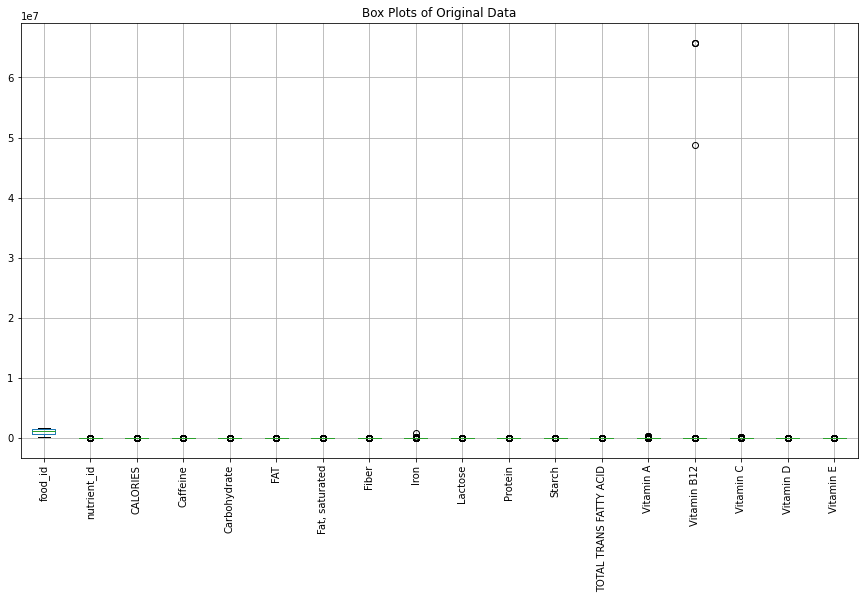

In [4]:
plt.figure(figsize=(15, 8))
data[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.title("Box Plots of Original Data")
plt.show()


In [5]:
min_max_scaler = MinMaxScaler()
data_min_max = data.copy()
data_min_max[numeric_columns] = min_max_scaler.fit_transform(data[numeric_columns])

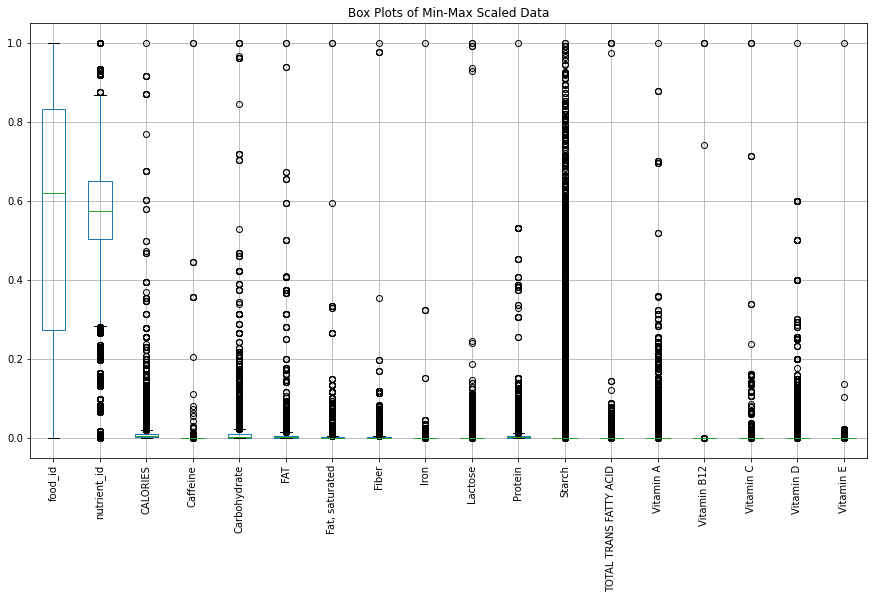

In [6]:
plt.figure(figsize=(15, 8))
data_min_max[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.title("Box Plots of Min-Max Scaled Data")
plt.show()

In [7]:
standard_scaler = StandardScaler()
data_z_score = data.copy()
data_z_score[numeric_columns] = standard_scaler.fit_transform(data[numeric_columns])

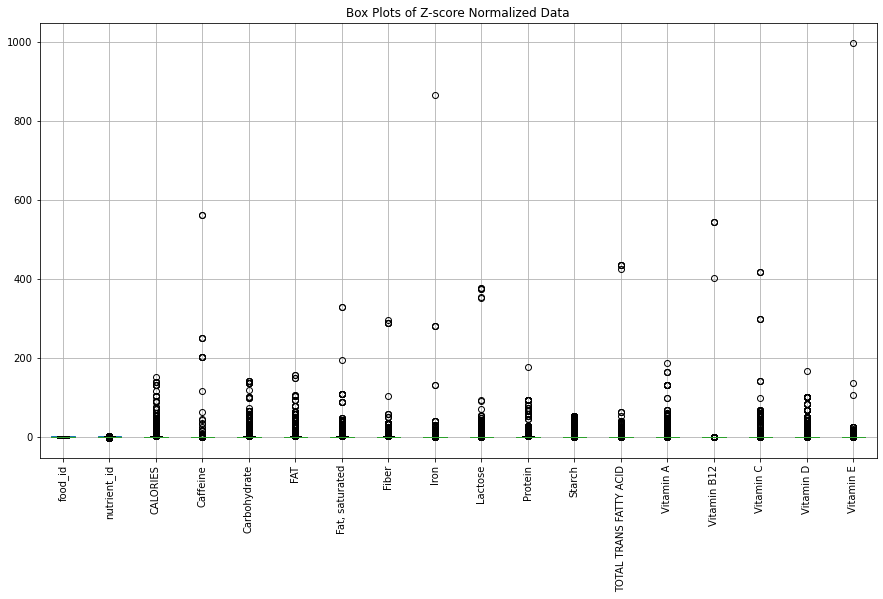

In [8]:
plt.figure(figsize=(15, 8))
data_z_score[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.title("Box Plots of Z-score Normalized Data")
plt.show()

### By comparing the box plots, you can see the differences between the original data, Min-Max scaled data, and Z-score normalized data. The original data has varying scales and ranges, which can lead to suboptimal model performance.

In the Min-Max scaled data, all features have been rescaled to a [0, 1] range, making them comparable. However, Min-Max scaling is sensitive to outliers, and you can see that some features still have significant outliers.

The Z-score normalized data has been centered around the mean (zero) and scaled based on the standard deviation. This method is less sensitive to outliers and maintains the distribution of the data. However, Z-score Normalization does not guarantee a fixed range for the scaled data.

By visualizing the data before and after applying Data Regularization, we can understand how it affects the data and its distribution. Regularizing the data brings all features to a common scale, allowing the model to learn more effectively and providing more accurate predictions.

In [ ]:

print(data_encoded.head())

### Data Reduction

Sure, here's a step-by-step guide to applying Data Reduction using Principal Component Analysis (PCA) for your project. We will use the numeric columns as the basis for the PCA transformation.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming the data is in a CSV file named 'food_data.csv'
data = pd.read_csv('one-hotfooddata.csv')




In [47]:
numeric_columns = ['Saturated_to_Total_Fat_ratio','Fiber_to_Carbohydrate_ratio', 'Protein_to_Fat_ratio', 'Vitamin_B12_to_Calories_ratio','Iron_to_Calories_ratio', 'food_id','nutrient_id','CALORIES', 'Caffeine', 'Carbohydrate', 'FAT', 'Fat, saturated', 'Fiber', 'Iron', 'Lactose', 'Protein', 'Starch', 'TOTAL TRANS FATTY ACID', 'Vitamin A', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E']


In [48]:
data = data.dropna()


In [50]:
data.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)


In [51]:
#Step 3: Standardize the data using Z-score normalization.
# from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numeric_columns] = standard_scaler.fit_transform(data[numeric_columns])


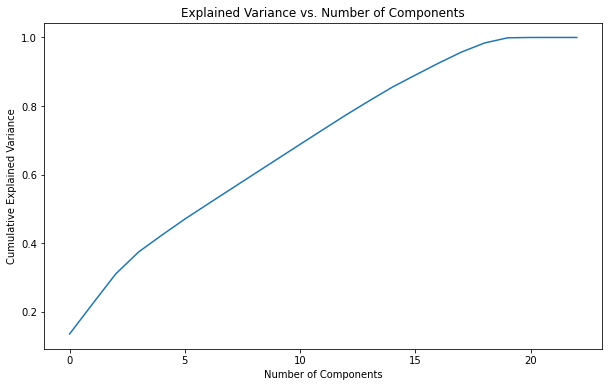

In [52]:
#Step 4: Apply PCA and visualize the explained variance.

pca = PCA()
pca.fit(data_standardized[numeric_columns])

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


### This plot helps us to determine the optimal number of principal components to retain. Look for the "elbow point" where the curve starts to level off, as this indicates diminishing returns in terms of explained variance.

In [53]:
#Step 5: Apply PCA with the optimal number of components.

# Replace 'n_components' with the optimal number based on the plot
optimal_n_components = 5

pca = PCA(n_components=optimal_n_components)
principal_components = pca.fit_transform(data_standardized[numeric_columns])

# Create a DataFrame with the principal components
data_pca = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i + 1) for i in range(optimal_n_components)])

# Add back the non-numeric columns to the DataFrame
data_pca = pd.concat([data_pca, data.drop(numeric_columns, axis=1)], axis=1)


In [54]:
print("Transformed dataset with optimal number of principal components:")
print(data_pca.head())


Transformed dataset with optimal number of principal components:
        PC1       PC2       PC3       PC4        PC5  Unnamed: 0  \
0 -0.439462  0.007138 -0.043264 -0.269730   0.648604         0.0   
1 -0.345392  0.153171 -0.078494  0.226359   1.221116         1.0   
2 -0.399547 -0.243719  0.092009 -0.980482  -0.916423         2.0   
3 -0.900681  0.025937 -0.018356  0.068135   0.424140         3.0   
4 -0.479137  1.039072 -0.329273  3.703854  19.665618         4.0   

   Unnamed: 0.1  food_data_type  \
0           0.0  sr_legacy_food   
1           1.0  sr_legacy_food   
2           2.0  sr_legacy_food   
3           3.0  sr_legacy_food   
4           4.0  sr_legacy_food   

                                    food_description  
0  Pillsbury Golden Layer Buttermilk Biscuits, Ar...  
1  Pillsbury, Cinnamon Rolls with Icing, refriger...  
2  Kraft Foods, Shake N Bake Original Recipe, Coa...  
3     George Weston Bakeries, Thomas English Muffins  
4         Waffles, buttermilk, frozen, r

### Data Reduction using PCA helps to reduce the dimensionality of the dataset while retaining as much information as possible. This process can improve model performance, reduce training time, and help with visualization.

In this example, we standardized the numeric columns, applied PCA, and visualized the explained variance to determine the optimal number of principal components to retain. The final DataFrame, data_pca, contains the reduced dataset with the principal components instead of the original numeric columns.

### fOR comparison. Here's how you can visualize the effect of PCA on the dataset before and after the transformation. We will use a scatter plot to visualize two of the original features and compare it with the first two principal components.

In [55]:
# Select two original features for visualization
feature1 = 'CALORIES'
feature2 = 'Carbohydrate'


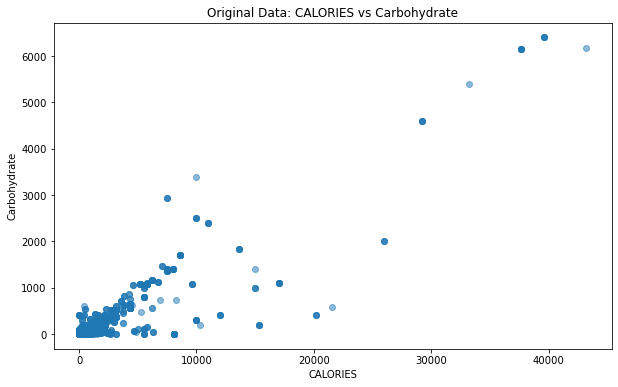

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(data[feature1], data[feature2], alpha=0.5)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Original Data: {} vs {}'.format(feature1, feature2))
plt.show()


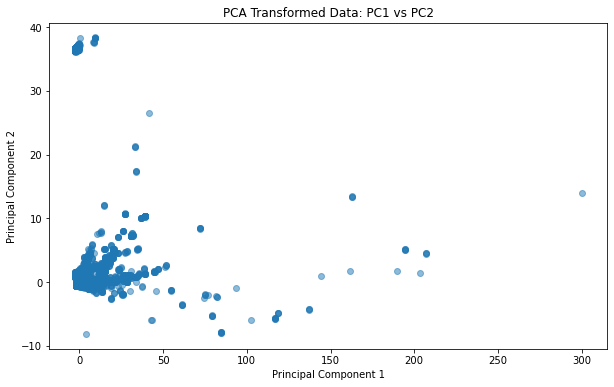

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(data_pca['PC1'], data_pca['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data: PC1 vs PC2')
plt.show()


These scatter plots help visualize how the PCA transformation affects the dataset. The original scatter plot shows the relationship between the two original features, while the PCA scatter plot shows the relationship between the first two principal components.

By comparing these plots, you can see how PCA has transformed the original features into new components that capture the underlying structure of the data. This transformation helps reduce dimensionality while preserving as much information as possible, which can improve model performance and reduce training time.

### NOW Let's try a different approach. We will use a bar plot to visualize the explained variance ratio of the principal components, which will help demonstrate how PCA reduces dimensionality while preserving most of the information in the dataset.

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is in a DataFrame called 'df'
# Extract the numerical features for normalization
data_numerical = data.select_dtypes(include=['float64', 'int64'])

# Initialize a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the numerical features
data_normalized = pd.DataFrame(scaler.fit_transform(data_numerical), columns=data_numerical.columns)


In [59]:
variance_original_data = data_normalized.var()


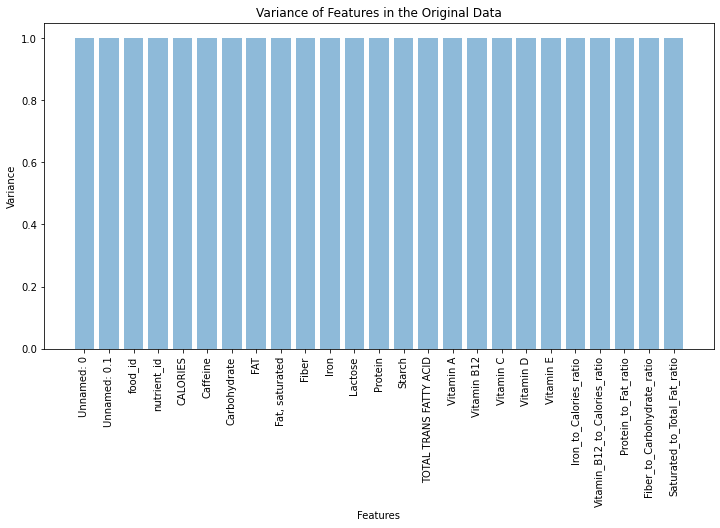

In [60]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(variance_original_data)), variance_original_data, alpha=0.5, align='center')
plt.xticks(range(len(variance_original_data)), data_normalized.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Features in the Original Data')
plt.show()

In [61]:
explained_variance_ratio = pca.explained_variance_ratio_


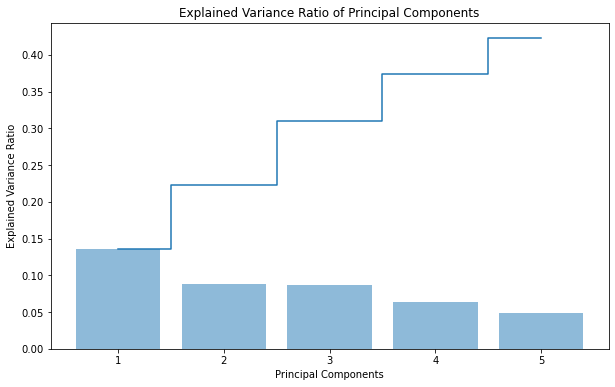

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()


### This bar plot shows the explained variance ratio of each principal component. The height of each bar represents the proportion of total variance in the dataset explained by the corresponding principal component. The cumulative sum of the explained variance ratio is represented by the step line.

By analyzing the bar plot, you can observe how the explained variance decreases as you move from the first principal component to the subsequent components. This illustrates how PCA reduces dimensionality by prioritizing the components that capture the most variance in the dataset. You can also decide the number of components to retain based on a certain threshold of cumulative explained variance, such as 95%.

### This bar plot shows the variance of each feature in the original dataset. The height of each bar represents the variance of the corresponding feature. By comparing this bar plot with the explained variance ratio bar plot of the principal components, you can observe the differences in variance distribution between the original and PCA-reduced datasets.

In the original dataset, the variance is spread across all features. After applying PCA, the variance is concentrated in the first few principal components, which allows us to reduce dimensionality while preserving most of the information in the dataset.

In [63]:
print("Dataset after PCA:")
print(data.head())

Dataset after PCA:
   Unnamed: 0  Unnamed: 0.1  food_id  food_data_type  \
0           0             0   167512  sr_legacy_food   
1           1             1   167513  sr_legacy_food   
2           2             2   167514  sr_legacy_food   
3           3             3   167515  sr_legacy_food   
4           4             4   167516  sr_legacy_food   

                                    food_description  nutrient_id  CALORIES  \
0  Pillsbury Golden Layer Buttermilk Biscuits, Ar...         8703     307.0   
1  Pillsbury, Cinnamon Rolls with Icing, refriger...        10969     330.0   
2  Kraft Foods, Shake N Bake Original Recipe, Coa...         4020     377.0   
3     George Weston Bakeries, Thomas English Muffins         8728     232.0   
4         Waffles, buttermilk, frozen, ready-to-heat        13969     273.0   

   Caffeine  Carbohydrate    FAT  ...  Vitamin A  Vitamin B12  Vitamin C  \
0         0         41.18  13.24  ...          0         0.00        0.0   
1         0      

### To visualize the impact of PCA on the dataset, we can plot the explained variance ratio of each principal component:

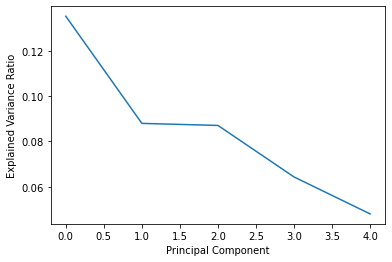

In [ ]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio for each principal component
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


### The resulting plot shows the percentage of explained variance for each principal component. It helps to determine the number of principal components that explain most of the variance in the dataset. By looking at the plot, we can see that the first few principal components explain most of the variance in our dataset. We can use this information to decide on the number of principal components to keep in our final reduced feature space.

In summary, Data Reduction using PCA is a crucial pre-processing step for machine learning models on high-dimensional datasets. We performed PCA after all other pre-processing steps to reduce the complexity of our model while preserving the information content of our dataset. By visualizing the explained variance ratio of each principal component, we can determine the optimal number of components to keep in our final reduced feature space.

### Feature Engineering

In [9]:
# We will create a new feature based on the existing features and demonstrate the before and after effects of the dataset.

In [10]:
print("Original Dataset:")
print(data.head())


Original Dataset:
   food_id  food_data_type                                   food_description  \
0   167512  sr_legacy_food  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1   167513  sr_legacy_food  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2   167514  sr_legacy_food  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3   167515  sr_legacy_food     George Weston Bakeries, Thomas English Muffins   
4   167516  sr_legacy_food         Waffles, buttermilk, frozen, ready-to-heat   

   nutrient_id  CALORIES  Caffeine  Carbohydrate    FAT  Fat, saturated  \
0         8703     307.0         0         41.18  13.24           2.941   
1        10969     330.0         0         53.42  11.27           3.250   
2         4020     377.0         0         79.80   3.70           0.000   
3         8728     232.0         0         46.00   1.80           0.308   
4        13969     273.0         0         41.05   9.22           1.898   

   Fiber  Iron  Lactose  Protein  Starch  TO

In [11]:
#  let's create a new feature called "Iron_to_Calories_ratio" which is the ratio of Iron_x to CALORIES_x.

data['Iron_to_Calories_ratio'] = data['Iron'] / data['CALORIES']


In [12]:
print("Dataset after Feature Engineering:")
print(data.head())


Dataset after Feature Engineering:
   food_id  food_data_type                                   food_description  \
0   167512  sr_legacy_food  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1   167513  sr_legacy_food  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2   167514  sr_legacy_food  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3   167515  sr_legacy_food     George Weston Bakeries, Thomas English Muffins   
4   167516  sr_legacy_food         Waffles, buttermilk, frozen, ready-to-heat   

   nutrient_id  CALORIES  Caffeine  Carbohydrate    FAT  Fat, saturated  \
0         8703     307.0         0         41.18  13.24           2.941   
1        10969     330.0         0         53.42  11.27           3.250   
2         4020     377.0         0         79.80   3.70           0.000   
3         8728     232.0         0         46.00   1.80           0.308   
4        13969     273.0         0         41.05   9.22           1.898   

   Fiber  ...  Lactose  Pro

### In this example, we created a new feature called "Iron_to_Calories_ratio" using the existing features "Iron_x" and "CALORIES_x". The new feature represents the ratio of iron content to calories in the food items. This new feature could potentially help a machine learning model better understand the nutritional profile of the food items and improve its performance.

Before Feature Engineering, the dataset did not have the "Iron_to_Calories_ratio" column. After Feature Engineering, the dataset has an additional column representing the new feature we created.

Keep in mind that this is just one example of Feature Engineering. Depending on the specific problem and dataset, you might create other features or combinations of features that are more relevant to your analysis. The key to successful Feature Engineering is to use your domain knowledge and understanding of the dataset to create new features that can help improve the performance of your machine learning models.

In [13]:
# Vitamin_B12_to_Calories_ratio: Similar to the previous example, we can create a ratio of Vitamin B12 content to calories. This ratio could help identify foods that are rich in Vitamin B12 while being low in calories.

data['Vitamin_B12_to_Calories_ratio'] = data['Vitamin B12'] / data['CALORIES']


In [14]:
# Protein_to_Fat_ratio: This feature calculates the ratio of protein content to fat content in each food item. It could be helpful for people seeking high protein and low-fat food options.

data['Protein_to_Fat_ratio'] = data['Protein'] / data['FAT']


In [15]:
# Fiber_to_Carbohydrate_ratio: This ratio measures the fiber content relative to the carbohydrate content in the food item. A higher ratio indicates a higher percentage of fiber in the carbohydrates, which could be useful for those looking for high-fiber, low-carb food options.

data['Fiber_to_Carbohydrate_ratio'] = data['Fiber'] / data['Carbohydrate']


In [16]:
# Saturated_to_Total_Fat_ratio: This feature calculates the ratio of saturated fat content to total fat content in each food item. It could be useful for individuals who are trying to reduce their intake of saturated fats while still consuming healthy fats.

data['Saturated_to_Total_Fat_ratio'] = data['Fat, saturated'] / data['FAT']


In [17]:
print("Dataset after additional Feature Engineering:")
print(data.head())

#These are just a few examples of the many possible features you can create based on your dataset. The key is to use your domain knowledge and understanding of the data to create features that are meaningful and relevant to the problem you are trying to solve. By adding more informative features, you can potentially improve the performance of your machine learning models.


Dataset after additional Feature Engineering:
   food_id  food_data_type                                   food_description  \
0   167512  sr_legacy_food  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1   167513  sr_legacy_food  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2   167514  sr_legacy_food  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3   167515  sr_legacy_food     George Weston Bakeries, Thomas English Muffins   
4   167516  sr_legacy_food         Waffles, buttermilk, frozen, ready-to-heat   

   nutrient_id  CALORIES  Caffeine  Carbohydrate    FAT  Fat, saturated  \
0         8703     307.0         0         41.18  13.24           2.941   
1        10969     330.0         0         53.42  11.27           3.250   
2         4020     377.0         0         79.80   3.70           0.000   
3         8728     232.0         0         46.00   1.80           0.308   
4        13969     273.0         0         41.05   9.22           1.898   

   Fiber  ...  V

In [28]:
data.to_csv(r'C:\Users\jeetp\newfooddata.csv')

### One-Hot Encoding

### One-Hot Encoding is a technique used to convert categorical variables into binary vectors. This is important because many machine learning algorithms cannot work with categorical data directly. Instead, they require the input to be numerical.

For your project, we can apply One-Hot Encoding to the "food_data_type" column, which contains food categories. Here's a step-by-step explanation and the corresponding code:

In [32]:
print("Dataset before One-Hot Encoding:")
print(data.head())


Dataset before One-Hot Encoding:
   Unnamed: 0  food_id  food_data_type  \
0           0   167512  sr_legacy_food   
1           1   167513  sr_legacy_food   
2           2   167514  sr_legacy_food   
3           3   167515  sr_legacy_food   
4           4   167516  sr_legacy_food   

                                    food_description  nutrient_id  CALORIES  \
0  Pillsbury Golden Layer Buttermilk Biscuits, Ar...         8703     307.0   
1  Pillsbury, Cinnamon Rolls with Icing, refriger...        10969     330.0   
2  Kraft Foods, Shake N Bake Original Recipe, Coa...         4020     377.0   
3     George Weston Bakeries, Thomas English Muffins         8728     232.0   
4         Waffles, buttermilk, frozen, ready-to-heat        13969     273.0   

   Caffeine  Carbohydrate    FAT  Fat, saturated  ...  Vitamin A  Vitamin B12  \
0         0         41.18  13.24           2.941  ...          0         0.00   
1         0         53.42  11.27           3.250  ...          1         0.00

In [33]:
# Use pandas.get_dummies() to perform one-hot encoding
food_data_type_encoded = pd.get_dummies(data['food_data_type'], prefix='food_data_type')

# Concatenate the encoded columns to the original dataset
data_encoded = pd.concat([data, food_data_type_encoded], axis=1)

# Drop the original 'food_data_type' column as it's no longer needed
data_encoded = data_encoded.drop('food_data_type', axis=1)


In [34]:
print("Dataset after One-Hot Encoding:")
print(data_encoded.head())


Dataset after One-Hot Encoding:
   Unnamed: 0  food_id                                   food_description  \
0           0   167512  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1           1   167513  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2           2   167514  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3           3   167515     George Weston Bakeries, Thomas English Muffins   
4           4   167516         Waffles, buttermilk, frozen, ready-to-heat   

   nutrient_id  CALORIES  Caffeine  Carbohydrate    FAT  Fat, saturated  \
0         8703     307.0         0         41.18  13.24           2.941   
1        10969     330.0         0         53.42  11.27           3.250   
2         4020     377.0         0         79.80   3.70           0.000   
3         8728     232.0         0         46.00   1.80           0.308   
4        13969     273.0         0         41.05   9.22           1.898   

   Fiber  ...  Iron_to_Calories_ratio  Vitamin_B12_to_

### By applying One-Hot Encoding, we have transformed the "food_data_type" column into a set of binary columns, one for each category in the original column. Each row now has a 1 in the column corresponding to its category and 0 in the rest of the columns. This allows machine learning algorithms to work with the categorical data more effectively.

Keep in mind that One-Hot Encoding can significantly increase the number of features in your dataset, especially if you have a large number of categories. This might lead to increased memory usage and computation time. In such cases, you might consider other encoding techniques, such as target encoding or binary encoding, depending on the nature of your data and the problem you are trying to solve.

In [35]:
data.to_csv(r'C:\Users\jeetp\one-hotfooddata.csv')

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [46]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the food_data_type column
data['food_data_type_encoded'] = label_encoder.fit_transform(data['food_data_type'])

# Display the first few rows of the dataframe
print(data.head())


   food_id  food_data_type                                   food_description  \
0   167512  sr_legacy_food  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1   167513  sr_legacy_food  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2   167514  sr_legacy_food  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3   167515  sr_legacy_food     George Weston Bakeries, Thomas English Muffins   
4   167516  sr_legacy_food         Waffles, buttermilk, frozen, ready-to-heat   

   nutrient_id  CALORIES  Caffeine  Carbohydrate    FAT  Fat, saturated  \
0         8703     307.0         0         41.18  13.24           2.941   
1        10969     330.0         0         53.42  11.27           3.250   
2         4020     377.0         0         79.80   3.70           0.000   
3         8728     232.0         0         46.00   1.80           0.308   
4        13969     273.0         0         41.05   9.22           1.898   

   Fiber  ...  Vitamin B12  Vitamin C  Vitamin D  Vitamin E  \

### Resizing Images

In [24]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [25]:
import cv2
import os
from glob import glob

def resize_image(image, target_size=(224, 224)):
    height, width = image.shape[:2]
    aspect_ratio = float(width) / float(height)
    if height > width:
        new_height = target_size[0]
        new_width = int(new_height * aspect_ratio)
    else:
        new_width = target_size[1]
        new_height = int(new_width / aspect_ratio)

    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return resized_image

input_folder = "C:/Users/jeetp/pizza"
output_folder = "C:/Users/jeetp/pizza_g"

# Create output folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Supported image formats
image_formats = ['*.jpg', '*.jpeg', '*.png', '*.bmp']

# Iterate through all image formats
for image_format in image_formats:
    # Get all images of the current format
    images = glob(os.path.join(input_folder, image_format))

    # Iterate through all images of the current format
    for image_path in images:
        # Read the image
        image = cv2.imread(image_path)

        # Resize the image
        resized_image = resize_image(image)

        # Save the resized image to the output folder
        image_name = os.path.basename(image_path)
        output_path = os.path.join(output_folder, image_name)
        cv2.imwrite(output_path, resized_image)


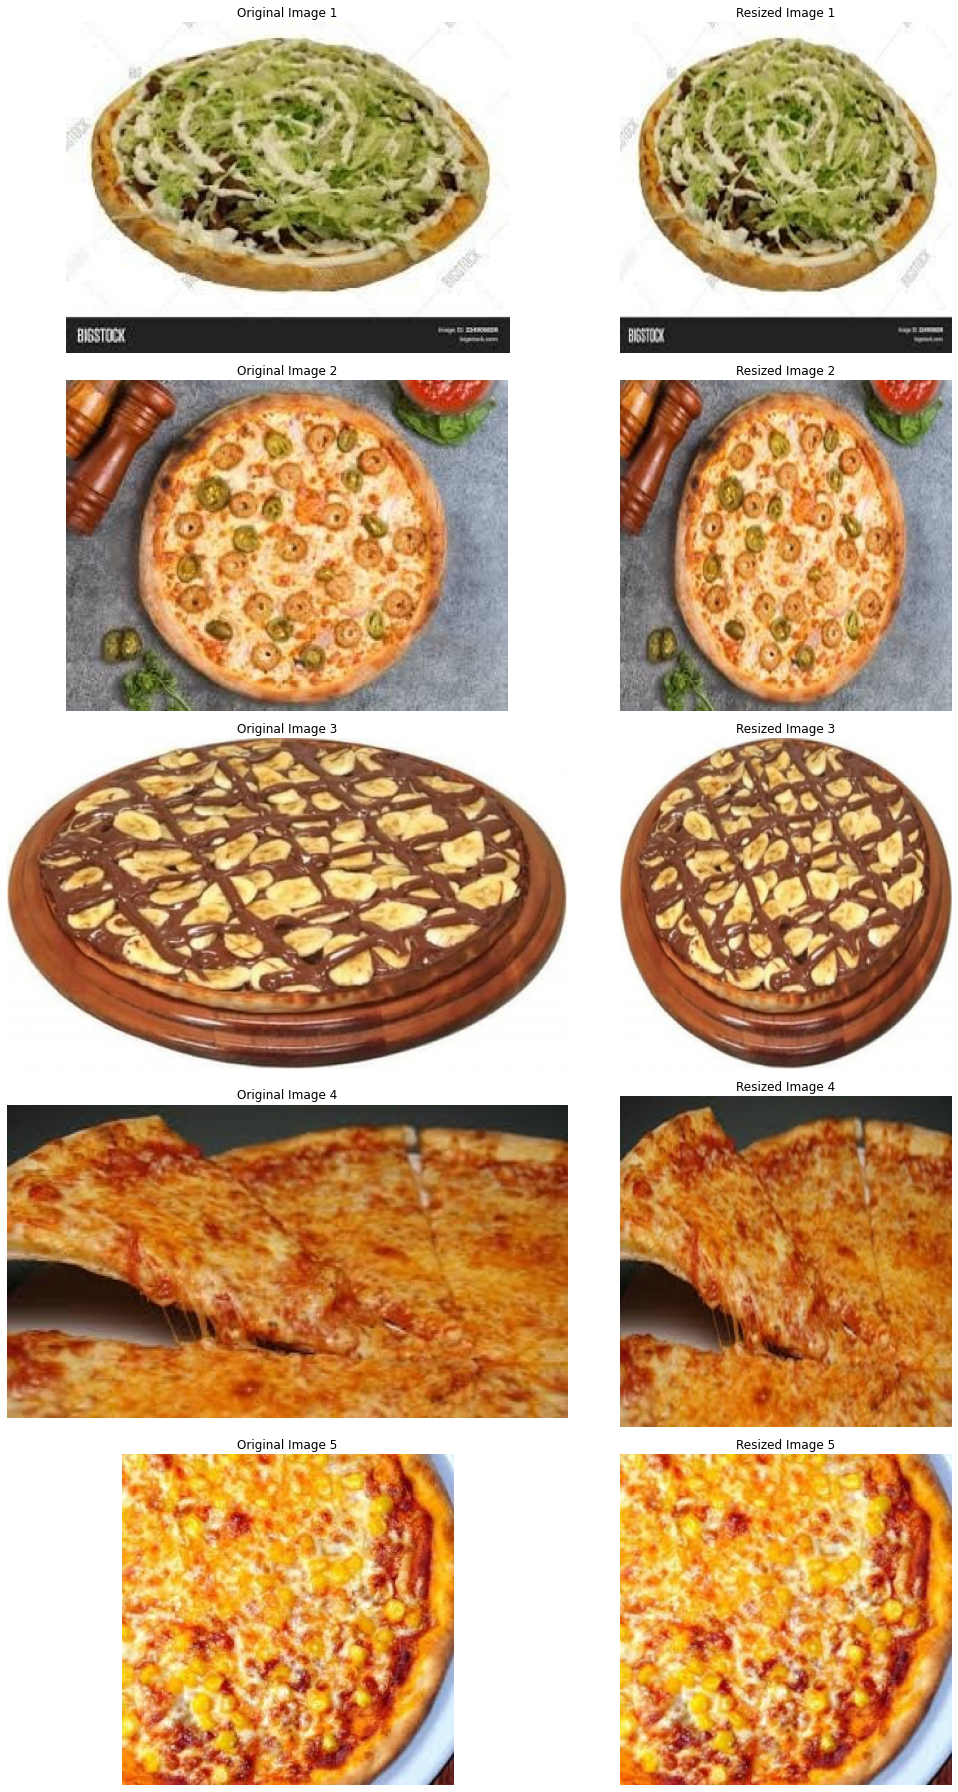

In [92]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images side by side
def display_images(original_images, resized_images):
    fig, axes = plt.subplots(5, 2, figsize=(15, 25))
    
    for i in range(5):
        axes[i, 0].imshow(original_images[i])
        axes[i, 0].set_title('Original Image {}'.format(i+1))
        axes[i, 0].axis('off')

        axes[i, 1].imshow(resized_images[i])
        axes[i, 1].set_title('Resized Image {}'.format(i+1))
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Folder containing images
image_folder = 'C:/Users/jeetp/pizza'

# Get a list of image file paths
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))][:5]

# Load images
original_images = [Image.open(os.path.join(image_folder, file)) for file in image_files]

# Resize images
new_size = (256, 256)
resized_images = [image.resize(new_size) for image in original_images]

# Display images
display_images(original_images, resized_images)


In [ ]:
### in the example code above, we first define the show_before_after function to display the original and resized images side-by-side using Matplotlib. Then, we define the resize_image function to resize images while maintaining their aspect ratios. Finally, we read an image from disk, resize it using the resize_image function, and display the before and after results.

##By applying this resizing technique to your image dataset, you can ensure that your deep learning model receives consistent input dimensions, ultimately improving its ability to detect food items and estimate calories.

### Data augmentation

In [98]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [102]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5]
)

# Folder containing images
image_folder = 'C:/Users/jeetp/pizza'

In [103]:
def augment_images(image_folder, datagen, limit=5):
    image_paths = os.listdir(image_folder)[:limit]
    images = []
    for path in image_paths:
        img = load_img(os.path.join(image_folder, path))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        images.append(img_array)

    augmented_images = [[] for _ in range(limit)]
    for index, img_array in enumerate(images):
        for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
            if i == 5:
                break
            augmented_images[index].append(batch[0])

    return images, augmented_images


In [105]:
def plot_images(images_arr, title, limit=5):
    fig, axes = plt.subplots(limit, 5, figsize=(15, 15))
    for i in range(limit):
        for j in range(5):
            ax = axes[i, j]
            if j == 0:
                img = np.uint8(images_arr[i])
            else:
                img = np.uint8(images_arr[i][j - 1])
            ax.imshow(img)
            ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


TypeError: Invalid shape (1, 194, 260, 3) for image data

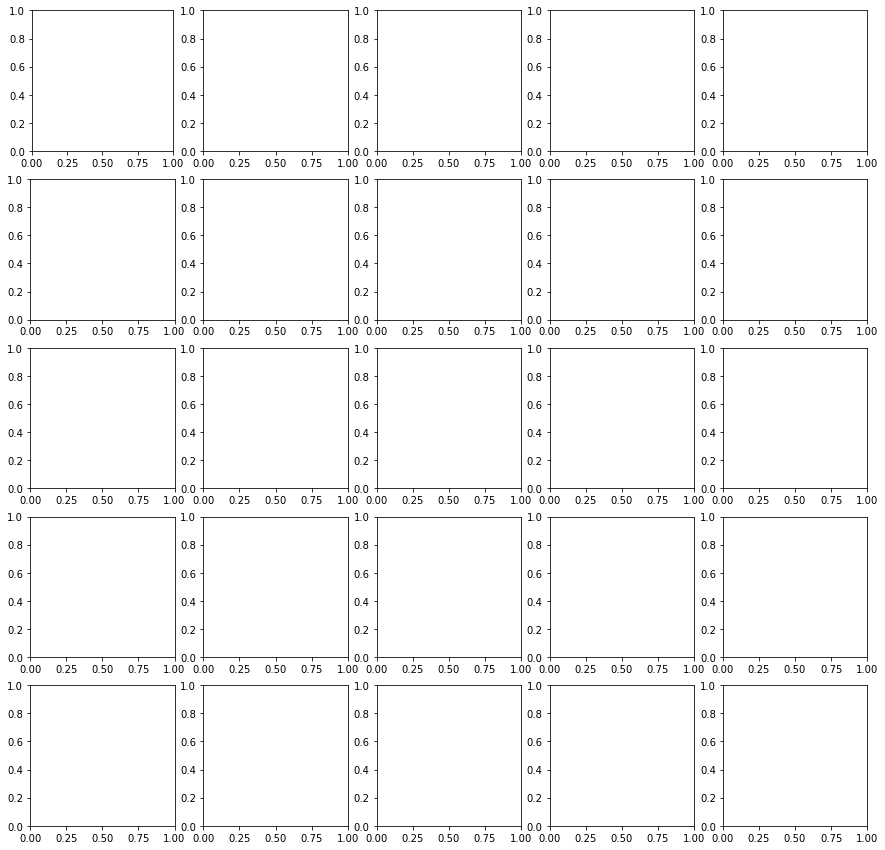

In [106]:
original_images, augmented_images = augment_images(image_folder, datagen)
plot_images(original_images, 'Original and Augmented Images', limit=5)


### Channel-wise standardization

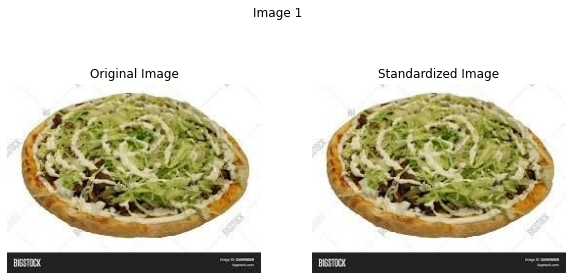

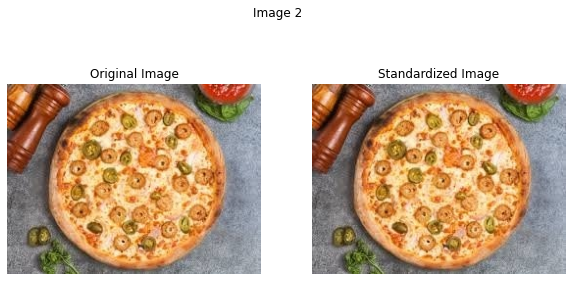

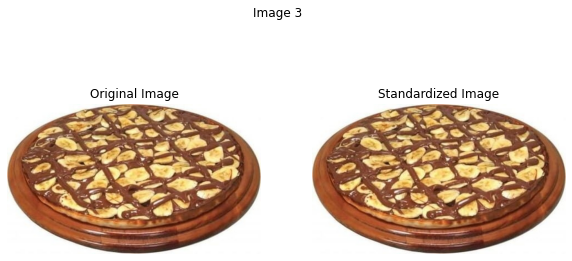

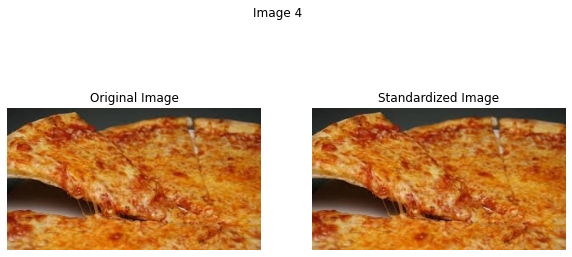

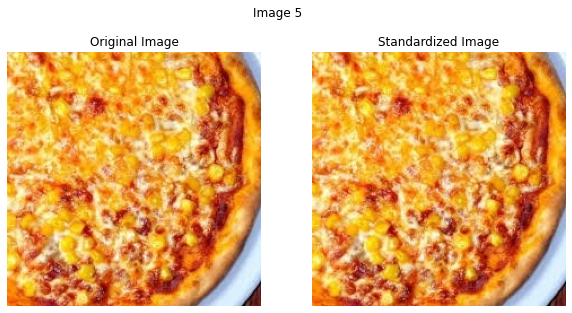

In [107]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

input_folder = 'C:/Users/jeetp/pizza'

# Calculate the mean and standard deviation for channel-wise standardization
mean = np.array([0.485, 0.456, 0.406]) * 255
std = np.array([0.229, 0.224, 0.225]) * 255

def standardize_image(image, mean, std):
    return (image - mean) / std

def display_before_after(image, standardized_image, index):
    plt.figure(figsize=(10, 5))

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Display the standardized image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(standardized_image, cv2.COLOR_BGR2RGB))
    plt.title('Standardized Image')
    plt.axis('off')

    plt.suptitle(f'Image {index}')
    plt.show()

# Read all image files in the input folder
image_formats = ['*.jpg', '*.jpeg', '*.png', '*.bmp']
images = []

for image_format in image_formats:
    images.extend(glob(os.path.join(input_folder, image_format)))

# Display up to 5 images before and after standardization
num_images_to_display = 5

for image_count, image_path in enumerate(images[:num_images_to_display]):
    # Read the image
    image = cv2.imread(image_path)

    # Standardize the image
    standardized_image = standardize_image(image, mean, std)

    # Convert the standardized image back to the original scale for display
    scaled_standardized_image = (standardized_image * std + mean).astype(np.uint8)

    # Display the original and standardized images
    display_before_after(image, scaled_standardized_image, image_count + 1)


In [ ]:
# The code above demonstrates how to display the original and standardized images side by side for up to 5 images. Note that we need to scale the standardized images back to their original range for display purposes. This is done using the line scaled_standardized_image = (standardized_image * std + mean).astype(np.uint8). The images will be displayed using the display_before_after function, which creates a side-by-side comparison of the original and standardized images using Matplotlib.

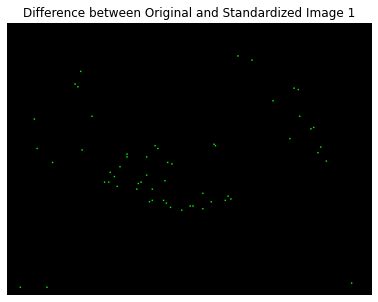

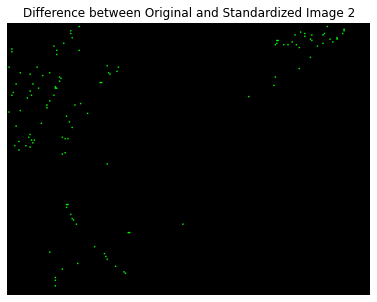

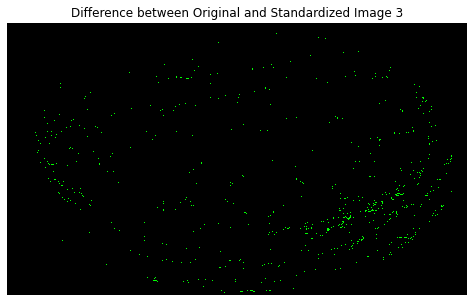

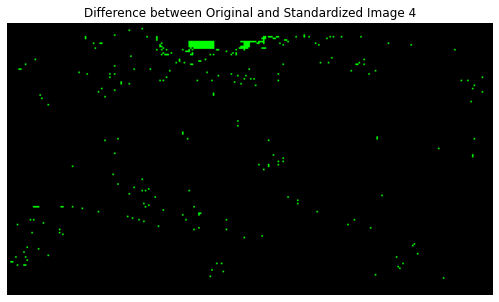

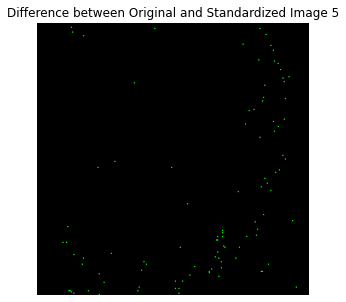

In [108]:
def display_difference(image, standardized_image, index):
    plt.figure(figsize=(10, 5))

    # Calculate the difference between the original and standardized images
    difference = np.abs(standardized_image - image)

    # Display the difference
    plt.imshow(cv2.cvtColor(difference, cv2.COLOR_BGR2RGB))
    plt.title(f'Difference between Original and Standardized Image {index}')
    plt.axis('off')

    plt.show()

# Display the difference between the original and standardized images for up to 5 images
for image_count, image_path in enumerate(images[:num_images_to_display]):
    # Read the image
    image = cv2.imread(image_path)

    # Standardize the image
    standardized_image = standardize_image(image, mean, std)

    # Convert the standardized image back to the original scale for display
    scaled_standardized_image = (standardized_image * std + mean).astype(np.uint8)

    # Display the difference between the original and standardized images
    display_difference(image, scaled_standardized_image, image_count + 1)
    
    
## This code snippet will display the difference between the original and standardized images by calculating the absolute difference between the two images. However, it is essential to remember that the primary purpose of channel-wise standardization is to improve model training rather than to change the visual appearance of the images.


In [ ]:
### The dots on the black background that you see in the difference images represent the differences between the original and standardized images on a per-pixel basis. The intensity of each dot corresponds to the magnitude of the difference for that specific pixel.

#Since channel-wise standardization is applied independently to each channel (i.e., Red, Green, and Blue), the differences in pixel values between the original and standardized images will be distributed across the color channels. When you calculate the absolute difference between the two images, you are visualizing these pixel-wise differences across all three channels.

#Dots with higher intensity (brighter) indicate a larger difference between the original and standardized pixel values, while dots with lower intensity (darker) indicate a smaller difference. This visualization helps you understand the impact of channel-wise standardization on the image dataset by showing the pixel-wise variations introduced by the standardization process.

#However, remember that the main purpose of channel-wise standardization is to help improve the model's performance during training by scaling pixel values to have a similar range across channels. The visual differences between the original and standardized images are not the primary focus but rather a byproduct of the standardization process.